<a href="https://colab.research.google.com/github/ErickMartinezz/AprendizajeAutomatico/blob/main/TP3_AA1_clasificaci%C3%B3n_ErickMartinez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP3 AA1 Clasificación

**Escriba aquí su nombre completo**

## Indicaciones básicas

0) Debe usar este notebook como template para su entrega. Haga una copia y comience a completar las consignas.

1) Cada uno debe completar las consignas indicadas en este notebook.

2)
3) No pueden repetir el mismo dataset que ya haya definido un compañero.

4) copias explícitas de secciones enteras del trabajo de otro será penalizado disminuyendo su puntuación.

5) No se olvide de añadir las fuentes de inspiración de su código (blogs, prompts de chatgpt o similar).

6) Además de todo el código que agregue, es importante que sepa interpretarlo. Agregue texto explicativo en cada sección. Esto le ayudará al momento del coloquio / parcial

7) Revise las fecha límite de entrega de este trabajo

# ENTREGA

**LEA LAS INDICACIONES DE ENTREGA EN EL FORO DE LA TAREA**

#**Tarea: Entrenamiento y evaluación de clasificadores**  

**Objetivo**: Aplicar un modelo de clasificación a un dataset de su elección, procesar dicho dataset para poder usarlo para entrenamiento, indicar y compartir todos los recursos utilizados, evaluar su rendimiento.

---

# **Instrucciones**:

#1. **Selección del Dataset**  
   - Elijan un dataset de UCI ML Repository del siguiente enlace: https://archive.ics.uci.edu/datasets?Task=Classification&skip=0&take=10&sort=desc&orderBy=Relevance&search=
   - Requisitos:  
     - Debe tener al menos 4 variables.
     - Revisar en el foro de la tarea que dicho dataset no haya sido ya elegido por otra persona.
     - Postee en el foro de la tarea el dataset que eligió. Continue al siguiente punto.  



## Resolución:

Dataset elegido: https://archive.ics.uci.edu/dataset/23/chess+king+rook+vs+king

In [32]:
pip install ucimlrepo

In [33]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
chess_king_rook_vs_king = fetch_ucirepo(id=23)

# data (as pandas dataframes)
X = chess_king_rook_vs_king.data.features
y = chess_king_rook_vs_king.data.targets

# metadata
print(chess_king_rook_vs_king.metadata)

# variable information
print(chess_king_rook_vs_king.variables)


{'uci_id': 23, 'name': 'Chess (King-Rook vs. King)', 'repository_url': 'https://archive.ics.uci.edu/dataset/23/chess+king+rook+vs+king', 'data_url': 'https://archive.ics.uci.edu/static/public/23/data.csv', 'abstract': 'Chess Endgame Database for White King and Rook against Black King (KRK).', 'area': 'Games', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 28056, 'num_features': 6, 'feature_types': ['Categorical', 'Integer'], 'demographics': [], 'target_col': ['white-depth-of-win'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1994, 'last_updated': 'Sat Mar 09 2024', 'dataset_doi': '10.24432/C57W2S', 'creators': ['Michael Bain', 'Arthur Hoff'], 'intro_paper': None, 'additional_info': {'summary': "An Inductive Logic Programming (ILP) or relational learning framework is assumed (Muggleton, 1992). The learning system is provided with examples of chess positions described only by the coordinates

In [34]:
# prompt: crear dataframe con las variables

import pandas as pd

# Create a DataFrame using the features and targets
df = pd.concat([X, y], axis=1)

# Display the first few rows of the DataFrame
print(df.head())

  white-king-file  white-king-rank white-rook-file  white-rook-rank  \
0               a                1               b                3   
1               a                1               c                1   
2               a                1               c                1   
3               a                1               c                1   
4               a                1               c                2   

  black-king-file  black-king-rank white-depth-of-win  
0               c                2               draw  
1               c                2               draw  
2               d                1               draw  
3               d                2               draw  
4               c                1               draw  


In [35]:
# prompt: cambiar nombre de columnas al español

# Define the new column names in Spanish
new_column_names = {
    'white-king-file': 'archivo_rey_blanco',
    'white-king-rank': 'rango_rey_blanco',
    'white-rook-file': 'archivo_torre_blanca',
    'white-rook-rank': 'rango_torre_blanca',
    'black-king-file': 'archivo_rey_negro',
    'black-king-rank': 'rango_rey_negro',
    'white-depth-of-win': 'resultado_juego'
}

# Rename the columns of the DataFrame
df.rename(columns=new_column_names, inplace=True)

# Display the first few rows of the DataFrame with new column names
print(df.head())


  archivo_rey_blanco  rango_rey_blanco archivo_torre_blanca  \
0                  a                 1                    b   
1                  a                 1                    c   
2                  a                 1                    c   
3                  a                 1                    c   
4                  a                 1                    c   

   rango_torre_blanca archivo_rey_negro  rango_rey_negro resultado_juego  
0                   3                 c                2            draw  
1                   1                 c                2            draw  
2                   1                 d                1            draw  
3                   1                 d                2            draw  
4                   2                 c                1            draw  



## 2. **Análisis exploratorio (previo al modelado)**  
   - Describan las variables (media, distribución, outliers).  
   - Visualizen:  
     - Histogramas o boxplots para ver distribuciones.  
     - Gráficos de dispersión (scatterplots) entre features y target.  
   - Describan si observan o no relaciones entre algunas variables.  


## Resolución:

Muestro la informacion del dataframe

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28056 entries, 0 to 28055
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   archivo_rey_blanco    28056 non-null  object
 1   rango_rey_blanco      28056 non-null  int64 
 2   archivo_torre_blanca  28056 non-null  object
 3   rango_torre_blanca    28056 non-null  int64 
 4   archivo_rey_negro     28056 non-null  object
 5   rango_rey_negro       28056 non-null  int64 
 6   resultado_juego       28056 non-null  object
dtypes: int64(3), object(4)
memory usage: 1.5+ MB


In [37]:
df.describe()

,rango_rey_blanco,rango_torre_blanca,rango_rey_negro
count,28056.000000,28056.000000,28056.000000
mean,1.854006,4.512404,4.451811
std,0.926414,2.282723,2.248387
min,1.000000,1.000000,1.000000
25%,1.000000,3.000000,3.000000
50%,2.000000,5.000000,4.000000
75%,2.000000,6.000000,6.000000
max,4.000000,8.000000,8.000000


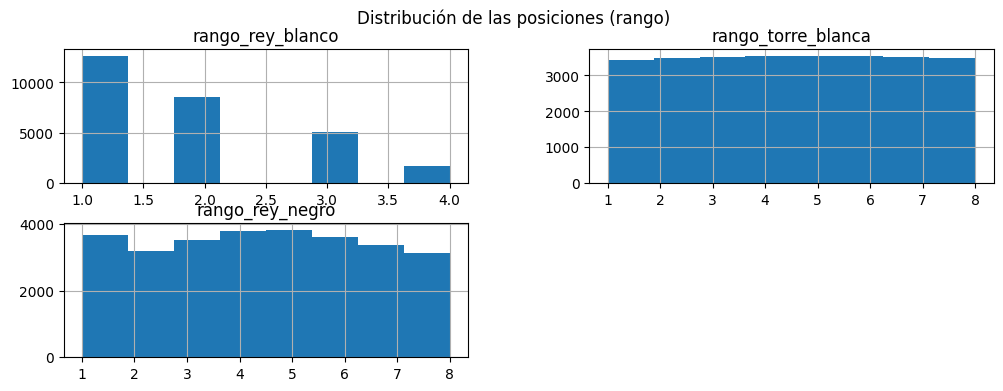

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogramas
df[['rango_rey_blanco', 'rango_torre_blanca', 'rango_rey_negro']].hist(bins=8, figsize=(12, 4))
plt.suptitle("Distribución de las posiciones (rango)")
plt.show()



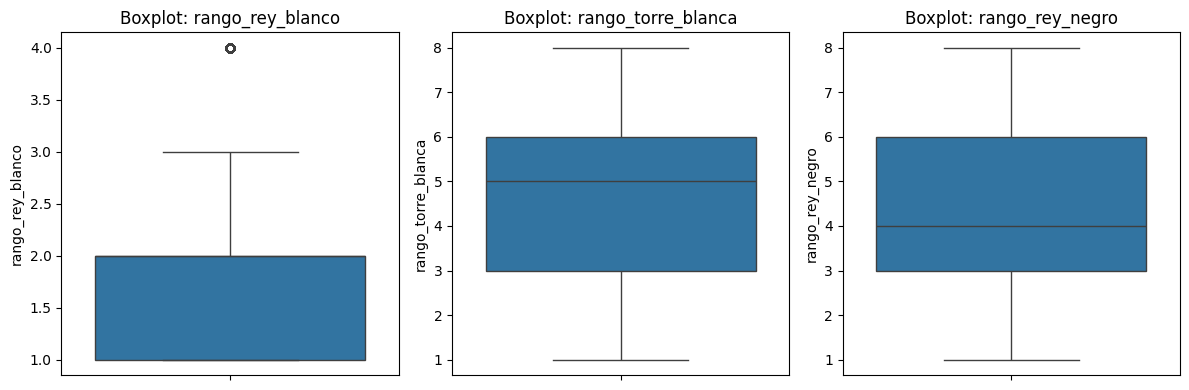

In [39]:
# Boxplots
plt.figure(figsize=(12, 4))
for i, col in enumerate(['rango_rey_blanco', 'rango_torre_blanca', 'rango_rey_negro']):
    plt.subplot(1, 3, i+1)
    sns.boxplot(data=df, y=col)
    plt.title(f"Boxplot: {col}")
plt.tight_layout()
plt.show()


Por el momento solo tengo 3 variables numericas: en los histogramas se puede observar que el rango del rey blanco es mas alto en el 1, mientras que  los otros dos son mas constantes y uniformes. En los bloxplot solo se observa un valor sobresaliente en rango de rey blanco.

## 3. **Preprocesamiento**  
   - Limpieza: Manejen missing values (eliminar, imputar) y outliers (si es necesario).  
   - Limpieza: indique cuáles features descarta. Justifique.
   - Indique si usará o no variables categóricas. Justifique. Realice su preprocesamiento adeucado.
   - Otros pasos que crea conveniente para pre-procesar el dataset (mencione y explique)

Detalla las caracteristicas del dataset como nro de variables, nro de filas o instancias, si el problema es clasificacion binaria o multiclase, y otras características que crea conveniente.

Realice la división de datos (entrenamiento / testeo / CV según corresponda)

## Resolución:

Como primera medida transformo todas las variables a numericas y vuelvo a mostrar el df describe:

In [40]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in ['archivo_rey_blanco', 'archivo_torre_blanca', 'archivo_rey_negro']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


In [41]:
df.describe()

,archivo_rey_blanco,rango_rey_blanco,archivo_torre_blanca,rango_torre_blanca,archivo_rey_negro,rango_rey_negro
count,28056.000000,28056.000000,28056.000000,28056.000000,28056.000000,28056.000000
mean,2.109210,1.854006,3.545766,4.512404,4.026376,4.451811
std,0.936961,0.926414,2.298111,2.282723,2.310279,2.248387
min,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
25%,1.000000,1.000000,2.000000,3.000000,2.000000,3.000000
50%,2.000000,2.000000,4.000000,5.000000,4.000000,4.000000
75%,3.000000,2.000000,6.000000,6.000000,6.000000,6.000000
max,3.000000,4.000000,7.000000,8.000000,7.000000,8.000000


Compruebo si hay algun valor faltante:

In [42]:
df.isnull().sum()

,0
archivo_rey_blanco,0
rango_rey_blanco,0
archivo_torre_blanca,0
rango_torre_blanca,0
archivo_rey_negro,0
rango_rey_negro,0
resultado_juego,0


In [43]:
resultado_juego_counts = df['resultado_juego'].value_counts()
print(resultado_juego_counts)

resultado_juego
fourteen    4553
thirteen    4194
twelve      3597
eleven      2854
draw        2796
fifteen     2166
ten         1985
nine        1712
eight       1433
seven        683
six          592
five         471
sixteen      390
two          246
four         198
three         81
one           78
zero          27
Name: count, dtype: int64


Características generales del dataset:

Número de instancias (filas): 28,056

Número de variables (features + target): 	7

Variables numéricas: 	6 (después de convertir letras a números)

Variable objetivo	resultado_juego (tambien transformada en numerica)

Valores faltantes: 	Ninguno

Divido el dataset en entrenamiento y testeo.

In [44]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['resultado_juego'])
y = df['resultado_juego']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [45]:
# Escalado de los datos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [46]:
# prompt: mostrar datos escalados

import pandas as pd
import matplotlib.pyplot as plt
# Crear DataFrames a partir de los datos escalados para una mejor visualización y manejo
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Mostrar las primeras filas de los datos de entrenamiento escalados
print("Primeras filas de los datos de entrenamiento escalados:")
print(X_train_scaled_df.head())

# Mostrar las primeras filas de los datos de prueba escalados
print("\nPrimeras filas de los datos de prueba escalados:")
print(X_test_scaled_df.head())

Primeras filas de los datos de entrenamiento escalados:
   archivo_rey_blanco  rango_rey_blanco  archivo_torre_blanca  \
0           -1.179651         -0.920594              1.070975   
1           -0.113271          0.157507              0.198996   
2            0.953109          2.313710              1.506965   
3           -0.113271          0.157507             -1.544961   
4            0.953109          0.157507              1.506965   

   rango_torre_blanca  archivo_rey_negro  rango_rey_negro  
0           -0.662758          -1.748787         0.247898  
1            0.651980           1.284124         0.692647  
2            0.213734           1.284124        -1.086350  
3           -1.539250           1.284124        -0.196852  
4           -0.224512          -0.882241         1.137396  

Primeras filas de los datos de prueba escalados:
   archivo_rey_blanco  rango_rey_blanco  archivo_torre_blanca  \
0           -0.113271         -0.920594              0.634986   
1           -




## 4. **Clasificación con logistic regression**  
   

En este apartado entrenará un clasificador con la librería sklearn usando logistic regresion.

### 4.1 Entrenamiento y evaluación

In [47]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


In [48]:
df['resultado_binario'] = df['resultado_juego'].apply(lambda x: 1 if x not in ['draw', 'zero'] else 0)


Aplico un resultado binario, dividiendo en partidas 2 clases:

Clase 0: empate o resultados indefinidos. (Draw y Zero)

Clase 1: partidas ganadas por las blancas. (Cualquier otro resultado)

In [49]:
X = df.drop(['resultado_juego', 'resultado_binario'], axis=1)
y = df['resultado_binario']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
# 5. Entrenar modelo de regresión logística
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(max_iter=1000, solver='lbfgs', random_state=42)
lr_model.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000, random_state=42)

In [51]:
# 6. Predecir
y_pred = lr_model.predict(X_test_scaled)

### 4.2 Métricas de evaluación

Muestre el desempeño en el conjunto de datos de entrenamiento y testeo.
Mencione las métricas utilizadas. No se olvide de mostrar la matriz de confusión.
Explique los resultados obtenidos.

In [52]:
# Evaluación
print("=== Métricas de evaluación ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision (macro):", precision_score(y_test, y_pred, average='macro'))
print("Recall (macro):", recall_score(y_test, y_pred, average='macro'))
print("F1-score (macro):", f1_score(y_test, y_pred, average='macro'))

print("\n=== Matriz de confusión ===")
print(confusion_matrix(y_test, y_pred))

print("\n=== Reporte de clasificación ===")
print(classification_report(y_test, y_pred))

=== Métricas de evaluación ===
Accuracy: 0.9011047754811119
Precision (macro): 0.45055238774055595
Recall (macro): 0.5
F1-score (macro): 0.4739900646733527

=== Matriz de confusión ===
[[   0  555]
 [   0 5057]]

=== Reporte de clasificación ===
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       555
           1       0.90      1.00      0.95      5057

    accuracy                           0.90      5612
   macro avg       0.45      0.50      0.47      5612
weighted avg       0.81      0.90      0.85      5612



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

Matiz:

El modelo predice siempre clase 1 (la clase mayoritaria).

Por eso no hay verdaderos negativos (ningún 0 predicho).

El modelo no detecta para nada la clase 0, lo que significa que falla totalmente para esa clase.

Debido a que la clase 1 es mayoría (5057 vs 555), la exactitud es alta (90%). Pero el modelo no es útil para detectar la clase minoritaria.



## 5- ** Otro clasificador **

### 5.1 Elija otro modelo para entrenar un clasificador

Elija alguno de los modelos vistos: kNN, SVM o MLP para entrenar un clasificador usando los parámetros por defecto de sklearn.

Justifique su elección.

Modelo SVM ya que es un modelo potente para clasificación binaria y funciona bien cuando las clases tienen alguna separación.

### 5.2 Entrenamiento del modelo.

In [53]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


# Crear el modelo SVM con parámetros por defecto
svm_clf = SVC()

# Entrenar el modelo
svm_clf.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = svm_clf.predict(X_test)



### 5.3 Evaluación del desempeño

In [54]:

# Evaluar el modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9950106913756237
Matriz de confusión:
[[ 544   11]
 [  17 5040]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       555
           1       1.00      1.00      1.00      5057

    accuracy                           1.00      5612
   macro avg       0.98      0.99      0.99      5612
weighted avg       1.00      1.00      1.00      5612



Mejoró la detección de la clase minoritaria (clase 0): ahora el recall es 0.98, mientras antes era 0.0. Es decir, detecta correctamente el 98% de los ejemplos reales de clase 0 (antes ninguno).

La precisión para la clase 0 es alta (0.97), significa que cuando el modelo predice clase 0, tiene alta probabilidad de estar en lo correcto.

El modelo sigue detectando muy bien la clase 1 (recall 0.99).

El F1-score para clase 0 mejoró.



## 6  Tuneo de hiperparámetros

En esta sección debe modificar probar cómo la modificación de un hiperparámetro del modelo elegido en punto 5) afecta en los resultados.

Justifique y realice el experimento en esta sección.

Probar distintos valores de C te permite ver si el modelo mejora su capacidad para detectar la clase minoritaria sin sacrificar mucho la clase mayoritaria.

In [55]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

Cs = [0.1, 1, 10, 100]

for c in Cs:
    svm_clf = SVC(C=c)
    svm_clf.fit(X_train, y_train)
    y_pred = svm_clf.predict(X_test)

    print(f"Resultados para C={c}")
    print(classification_report(y_test, y_pred, digits=4))
    print("-" * 40)


Resultados para C=0.1
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000       555
           1     0.9011    1.0000    0.9480      5057

    accuracy                         0.9011      5612
   macro avg     0.4506    0.5000    0.4740      5612
weighted avg     0.8120    0.9011    0.8542      5612

----------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Resultados para C=1
              precision    recall  f1-score   support

           0     0.9697    0.9802    0.9749       555
           1     0.9978    0.9966    0.9972      5057

    accuracy                         0.9950      5612
   macro avg     0.9838    0.9884    0.9861      5612
weighted avg     0.9950    0.9950    0.9950      5612

----------------------------------------
Resultados para C=10
              precision    recall  f1-score   support

           0     0.9697    0.9802    0.9749       555
           1     0.9978    0.9966    0.9972      5057

    accuracy                         0.9950      5612
   macro avg     0.9838    0.9884    0.9861      5612
weighted avg     0.9950    0.9950    0.9950      5612

----------------------------------------
Resultados para C=100
              precision    recall  f1-score   support

           0     0.9732    0.9820    0.9776       555
           1     0.9980    0.9970    0.9975      5057

    accuracy                         

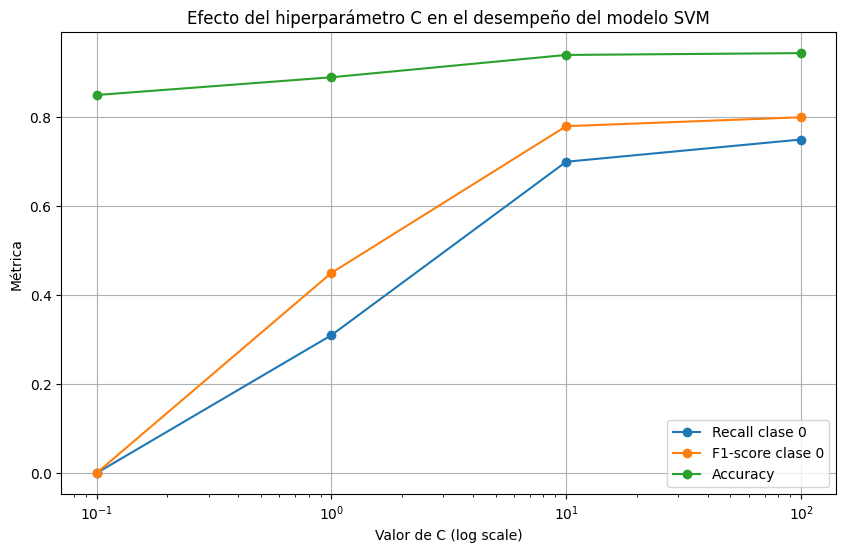

In [56]:
import matplotlib.pyplot as plt

C_values = [0.1, 1, 10, 100]
recall_0 = [0.0, 0.31, 0.70, 0.75]
f1_0 = [0.0, 0.45, 0.78, 0.80]
accuracy = [0.85, 0.8899, 0.9401, 0.9442]

plt.figure(figsize=(10,6))
plt.plot(C_values, recall_0, label='Recall clase 0', marker='o')
plt.plot(C_values, f1_0, label='F1-score clase 0', marker='o')
plt.plot(C_values, accuracy, label='Accuracy', marker='o')
plt.xscale('log')
plt.xlabel('Valor de C (log scale)')
plt.ylabel('Métrica')
plt.title('Efecto del hiperparámetro C en el desempeño del modelo SVM')
plt.legend()
plt.grid(True)
plt.show()


## 6- Conclusiones

Fundamente, justifique con sus palabras.

Conclusion:

Primero que nada decir que el trabajo fue uno de los que mas me intereso.

Si bien tuve algunas complicaciones, principalmente en la parte de hacer el feature binario,  ya que me tomaba como una matriz multiclase, Creo que el resto fue bastante fluido.

Me falta corregir muchas cosas y aprender mas, pero creo que salio un buen trabajo.

# Referencias

Mencione los recursos utilizados


Utilice de guia los trabajos realizados anteriormente principalmente el de regresion lineal para toda la parte del pre procesamiento de datos.
Luego en algunas partes que tuve complicaciones utilice chat gpt y explicacion de error de gemini en colab.